In [18]:
%pip install torchmetrics --quiet

Note: you may need to restart the kernel to use updated packages.


3. Cifar10 Dataset. Usar 10% del conjunto de prueba para validación en el entrenamiento. Reportar valor de perdida y exactitud para
entrenamiento y prueba. Proponer CNN procurando obtener resultados reportados entre el 45% - 71% de exactitud (LINK tener reservas de
los resultados reportados).

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

cifar_trainset = torchvision.datasets.CIFAR10(root='./data',
                                              train=True,
                                              download=True,
                                              transform=transform)
cifar_testset = torchvision.datasets.CIFAR10(root='./data', 
                                             train=False, 
                                             download=True,
                                             transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
next(iter(cifar_trainset))

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

Usar 10% del conjunto de prueba para validación en el entrenamiento.

In [21]:
from torch.utils.data import random_split

test_dataset_size = len(cifar_testset)

validation_size = int(test_dataset_size * 0.1)
test_size = test_dataset_size - validation_size

cifar_validationset, cifar_testset = random_split(cifar_testset,[validation_size, test_size])

print(f"Tamaño del conjunto de entrenamiento: {len(cifar_trainset)}")
print(f"Tamaño del conjunto de prueba: {len(cifar_testset)}")
print(f"Tamaño del conjunto de validación: {len(cifar_validationset)}")

Tamaño del conjunto de entrenamiento: 50000
Tamaño del conjunto de prueba: 9000
Tamaño del conjunto de validación: 1000


In [22]:
from torch.utils.data import DataLoader

batch_size = 128

train_data = DataLoader(dataset=cifar_trainset,
                        batch_size=batch_size,
                        num_workers=2,
                        shuffle=True)

test_data = DataLoader(dataset=cifar_testset,
                       batch_size=batch_size,
                       num_workers=2)

val_data = DataLoader(dataset=cifar_validationset,
                      batch_size=batch_size,
                      num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [23]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, num_classes):
        super(NeuralNetwork, self).__init__()

        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(in_features=16 * 5 * 5, out_features=120),
            nn.ReLU(),

            nn.Linear(in_features=120, out_features=84),
            nn.ReLU(),

            nn.Linear(in_features=84, out_features=num_classes)
        )

    def forward(self, x):
        return self.network(x)

model = NeuralNetwork(num_classes=len(classes))
model

NeuralNetwork(
  (network): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=120, bias=True)
    (8): ReLU()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [24]:
import torch

def get_device():
    device = ""
    if torch.cuda.is_available():
        !nvidia-smi
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')

    return device

device = get_device()
device

Mon May  8 04:27:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.05    Driver Version: 510.73.05    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P5000        Off  | 00000000:00:05.0 Off |                  Off |
| 26%   27C    P8     6W / 180W |   1768MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

device(type='cuda')

In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [26]:
import numpy as np

from pytorchtools import EarlyStopping
from torchmetrics.classification import Accuracy

def train_early(model, patience, epochs, num_classes):
    train_losses = []
    valid_losses = []

    avg_train_losses = []
    avg_valid_losses = []

    early_stopping = EarlyStopping(patience=patience, verbose=True)

    accuracy = Accuracy(task="multiclass", num_classes=num_classes)

    model = model.to(device)

    for epoch in range(epochs):
        running_loss = 0.0
        running_val_loss = 0.0
        model.train()
        for batch, (images, labels) in enumerate(train_data):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            train_losses.append(loss.item())

            if batch % 500 == 0:
                print(f'Epoch: {epoch+1}/{epochs} | Batch: {batch+1}/{len(train_data)} | Loss: {running_loss/100:.4f}')
                running_loss = 0.0

        # Validación del model
        model.eval()
        with torch.no_grad():
            for _, (images, labels) in enumerate(val_data):
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                loss = criterion(outputs, labels)

                accuracy.update(predicted.to('cpu'), labels.to('cpu'))

                running_val_loss += loss.item()
                valid_losses.append(loss.item())

        acc = accuracy.compute()
        print(f"Running Accuracy: {acc}")

        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)

        print(f'Epoch: {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Valid Loss: {valid_loss:.4f}')

        train_losses = []
        valid_losses = []

        early_stopping(valid_loss, model)

        if early_stopping.early_stop:
            print(f'Early stopping at epoch {epoch+1}')
            break


    model.load_state_dict(torch.load('checkpoint.pt'))

    print(f"Accuracy promedio: {accuracy.compute()}")

    return model, avg_train_losses, avg_valid_losses

In [27]:
patience = 2
epochs = 15
num_classes = 10

model, train_loss, valid_loss = train_early(model, 
                                      patience, 
                                      epochs, 
                                      num_classes)

Epoch: 1/15 | Batch: 1/391 | Loss: 0.0231
Running Accuracy: 0.12300000339746475
Epoch: 1/15 | Train Loss: 2.3031 | Valid Loss: 2.2967
Validation loss decreased (inf --> 2.296658).  Saving model ...
Epoch: 2/15 | Batch: 1/391 | Loss: 0.0230
Running Accuracy: 0.1550000011920929
Epoch: 2/15 | Train Loss: 2.2911 | Valid Loss: 2.2746
Validation loss decreased (2.296658 --> 2.274588).  Saving model ...
Epoch: 3/15 | Batch: 1/391 | Loss: 0.0228
Running Accuracy: 0.19200000166893005
Epoch: 3/15 | Train Loss: 2.2077 | Valid Loss: 2.0718
Validation loss decreased (2.274588 --> 2.071824).  Saving model ...
Epoch: 4/15 | Batch: 1/391 | Loss: 0.0213
Running Accuracy: 0.22200000286102295
Epoch: 4/15 | Train Loss: 2.0243 | Valid Loss: 1.9267
Validation loss decreased (2.071824 --> 1.926713).  Saving model ...
Epoch: 5/15 | Batch: 1/391 | Loss: 0.0203
Running Accuracy: 0.25099998712539673
Epoch: 5/15 | Train Loss: 1.9060 | Valid Loss: 1.8161
Validation loss decreased (1.926713 --> 1.816128).  Saving m

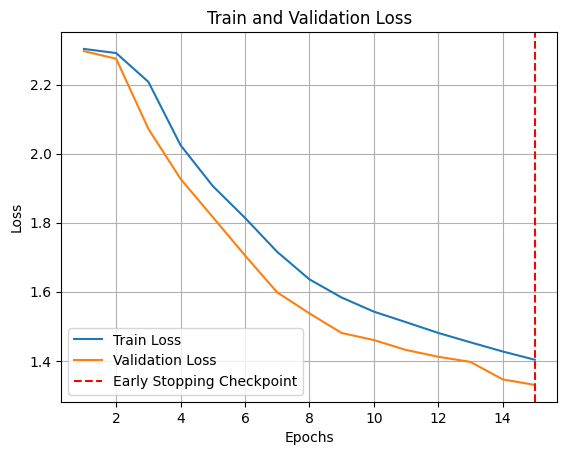

In [28]:
import matplotlib.pyplot as plt

# Generate x-axis values based on the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the train_loss and valid_loss
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, valid_loss, label='Validation Loss')

# Find the index of the minimum validation loss
min_valid_loss_idx = valid_loss.index(min(valid_loss))

# Add a vertical line to mark the early stopping checkpoint
plt.axvline(x=min_valid_loss_idx + 1, linestyle='--', color='r', label='Early Stopping Checkpoint')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.grid(True)

# Show legend
plt.legend()

# Display the plot
plt.show()

In [29]:
from torchmetrics.classification import Accuracy


def test(model):
    accuracy = Accuracy(task="multiclass", num_classes=num_classes)

    with torch.no_grad():
        model.eval()

        for data in test_data:
            inputs, labels = data
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)

            acc = accuracy.forward(predicted.to('cpu'), labels.to('cpu'))

        print(f"Accuracy: {accuracy.compute()}")


test(model)

Accuracy: 0.4968888759613037


In [30]:
import torch.optim as optim

model = NeuralNetwork(num_classes=len(classes))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [31]:
import numpy as np
from torchmetrics.classification import Accuracy

def train_full(model, epochs, num_classes):
    train_losses = []
    valid_losses = []

    avg_train_losses = []
    avg_valid_losses = []

    accuracy = Accuracy(task="multiclass", num_classes=num_classes)

    model = model.to(device)

    for epoch in range(epochs):
        running_loss = 0.0
        running_val_loss = 0.0
        model.train()
        for batch, (images, labels) in enumerate(train_data):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            train_losses.append(loss.item())

            if batch % 500 == 0:
                print(f'Epoch: {epoch+1}/{epochs} | Batch: {batch+1}/{len(train_data)} | Loss: {running_loss/100:.4f}')
                running_loss = 0.0

        # Validación del model
        model.eval()
        with torch.no_grad():
            for _, (images, labels) in enumerate(val_data):
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                loss = criterion(outputs, labels)

                accuracy.update(predicted.to('cpu'), labels.to('cpu'))

                running_val_loss += loss.item()
                valid_losses.append(loss.item())

        acc = accuracy.compute()
        print(f"Running Accuracy: {acc}")

        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)

        print(f'Epoch: {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Valid Loss: {valid_loss:.4f}')

        train_losses = []
        valid_losses = []

    print(f"Accuracy promedio: {accuracy.compute()}")

    return model, avg_train_losses, avg_valid_losses

In [32]:
epochs = 5
num_classes = 10

model, train_loss, valid_loss = train_full(model,
                                           epochs, 
                                           num_classes)

Epoch: 1/5 | Batch: 1/391 | Loss: 0.0230
Running Accuracy: 0.10999999940395355
Epoch: 1/5 | Train Loss: 2.3044 | Valid Loss: 2.3025
Epoch: 2/5 | Batch: 1/391 | Loss: 0.0230
Running Accuracy: 0.11400000005960464
Epoch: 2/5 | Train Loss: 2.3004 | Valid Loss: 2.2976
Epoch: 3/5 | Batch: 1/391 | Loss: 0.0230
Running Accuracy: 0.12700000405311584
Epoch: 3/5 | Train Loss: 2.2921 | Valid Loss: 2.2810
Epoch: 4/5 | Batch: 1/391 | Loss: 0.0229
Running Accuracy: 0.15524999797344208
Epoch: 4/5 | Train Loss: 2.2250 | Valid Loss: 2.1221
Epoch: 5/5 | Batch: 1/391 | Loss: 0.0217
Running Accuracy: 0.18299999833106995
Epoch: 5/5 | Train Loss: 2.0813 | Valid Loss: 2.0075
Accuracy promedio: 0.18299999833106995


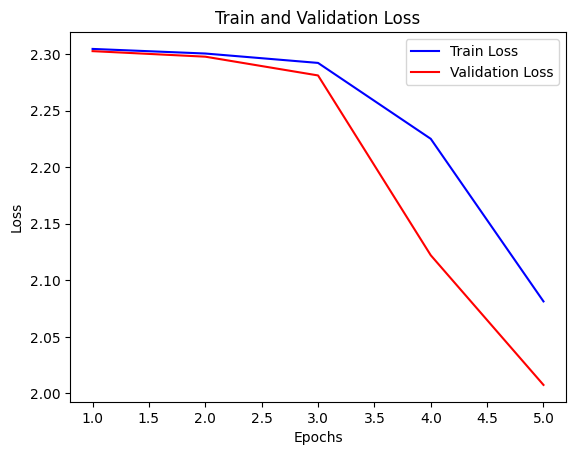

In [33]:
import matplotlib.pyplot as plt

# Generate x-axis values based on the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the train_loss and valid_loss
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, valid_loss, 'r', label='Validation Loss')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [34]:
test(model)

Accuracy: 0.27355554699897766
